# Final Project Module D EDA

## Disease Activity

We plan to focus on the ongoing Covid-19 pandemic. Therefore, our EDA will look at the two Covid datasources:
- John Hopkins University Center for Systems Science and Engineering (CSSEGIS): https://github.com/CSSEGISandData/COVID-19
- Midas Network: https://github.com/midas-network/COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## CSSEGIS Data

The CSSEGIS data has a few different data segments. The two folders we will mainly be looking at are the daily reports and the time series data. Let us further investigate the data.

### Daily Reports

There exists a daily report for each day starting from 01/22/2020 - present. Let us investigate the form of the daily reports by looking at the most recent CSV:

In [8]:
# Daily report 
april_06_dr = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-06-2020.csv')
april_06_dr.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-08 22:51:58,34.223334,-82.461707,5,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-08 22:51:58,30.295065,-92.414197,86,2,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-08 22:51:58,37.767072,-75.632346,11,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-08 22:51:58,43.452658,-116.241552,438,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-08 22:51:58,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [9]:
# Number of countries/regions listed
print(f"{len(april_06_dr.Country_Region.unique())} countries/regions are represented")

184 countries/regions are represented


In [10]:
US_countries_idx = np.where(april_06_dr.Country_Region == "US")
april_06_dr.iloc[US_countries_idx].Province_State.unique()

array(['South Carolina', 'Louisiana', 'Virginia', 'Idaho', 'Iowa',
       'Kentucky', 'Missouri', 'Oklahoma', 'Colorado', 'Illinois',
       'Indiana', 'Mississippi', 'Nebraska', 'Ohio', 'Pennsylvania',
       'Washington', 'Wisconsin', 'Vermont', 'Florida', 'North Carolina',
       'California', 'New York', 'Wyoming', 'Michigan', 'Maryland',
       'Alaska', 'Kansas', 'Tennessee', 'Texas', 'Maine', 'Minnesota',
       'Arizona', 'Georgia', 'Arkansas', 'New Jersey', 'South Dakota',
       'Alabama', 'West Virginia', 'North Dakota', 'Massachusetts',
       'Montana', 'New Hampshire', 'Oregon', 'New Mexico', 'Utah',
       'Rhode Island', 'Nevada', 'District of Columbia', 'Connecticut',
       'Hawaii', 'Delaware', 'Northern Mariana Islands',
       'Diamond Princess', 'Grand Princess', 'Guam', 'Puerto Rico',
       'Recovered', 'Virgin Islands'], dtype=object)

In [11]:
# Top confirmed cases in the US
april_06_dr.iloc[US_countries_idx].sort_values(by = ['Confirmed'], ascending = False)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
1687,36061.0,New York City,New York,US,2020-04-08 22:51:58,40.767273,-73.971526,81803,4571,0,0,"New York City, New York, US"
1669,36059.0,Nassau,New York,US,2020-04-08 22:51:58,40.740665,-73.589419,18548,500,0,0,"Nassau, New York, US"
2213,36103.0,Suffolk,New York,US,2020-04-08 22:51:58,40.883201,-72.801217,17008,323,0,0,"Suffolk, New York, US"
2514,36119.0,Westchester,New York,US,2020-04-08 22:51:58,41.162784,-73.757417,15887,283,0,0,"Westchester, New York, US"
527,17031.0,Cook,Illinois,US,2020-04-08 22:51:58,41.841448,-87.816588,10520,310,0,0,"Cook, Illinois, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2366,90055.0,Unassigned,Wisconsin,US,2020-04-08 22:51:58,NaN,NaN,0,0,0,0,"Unassigned, Wisconsin, US"
2367,NaN,Unassigned,Wyoming,US,2020-04-08 22:51:58,NaN,NaN,0,0,0,0,"Unassigned,Wyoming,US"
1968,47143.0,Rhea,Tennessee,US,2020-04-08 22:51:58,35.605362,-84.930766,0,0,0,0,"Rhea, Tennessee, US"
1384,31113.0,Logan,Nebraska,US,2020-04-08 22:51:58,41.566503,-100.481785,0,0,0,0,"Logan, Nebraska, US"


In [12]:
april_06_dr.sort_values(by = ['Confirmed'], ascending = False).head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2856,NaN,NaN,NaN,Spain,2020-04-08 22:51:39,40.463667,-3.749220,148220,14792,48021,85407,Spain
2784,NaN,NaN,NaN,Italy,2020-04-08 22:51:39,41.871940,12.567380,139422,17669,26491,95262,Italy
2765,NaN,NaN,NaN,Germany,2020-04-08 22:51:39,51.165691,10.451526,113296,2349,46300,64647,Germany
2761,NaN,NaN,NaN,France,2020-04-08 22:51:39,46.227600,2.213700,112950,10869,21254,80827,France
1687,36061.0,New York City,New York,US,2020-04-08 22:51:58,40.767273,-73.971526,81803,4571,0,0,"New York City, New York, US"
2650,NaN,NaN,Hubei,China,2020-04-08 00:37:38,30.975600,112.270700,67803,3213,64142,448,"Hubei, China"
2780,NaN,NaN,NaN,Iran,2020-04-08 22:51:39,32.427908,53.688046,64586,3993,29812,30781,Iran
2874,NaN,NaN,NaN,United Kingdom,2020-04-08 22:51:39,55.378100,-3.436000,60733,7097,135,53501,United Kingdom
2870,NaN,NaN,NaN,Turkey,2020-04-08 22:51:39,38.963700,35.243300,38226,812,1846,35568,Turkey
2718,NaN,NaN,NaN,Belgium,2020-04-08 22:51:39,50.833300,4.469936,23403,2240,4681,16482,Belgium


In [13]:
april_06_dr_by_country = april_06_dr.groupby(['Country_Region']).sum().reset_index()
april_06_dr_by_country.sort_values(by = ['Confirmed'], ascending = False).head(10)

,Country_Region,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
171,US,81147344.0,97520.370829,-232165.584444,429052,14695,23559,0
156,Spain,0.0,40.463667,-3.749220,148220,14792,48021,85407
84,Italy,0.0,41.871940,12.567380,139422,17669,26491,95262
61,France,0.0,91.463495,-238.646914,113959,10887,21452,81620
65,Germany,0.0,51.165691,10.451526,113296,2349,46300,64647
36,China,0.0,1083.336700,3684.419700,82809,3337,77567,1905
80,Iran,0.0,32.427908,53.688046,64586,3993,29812,30781
175,United Kingdom,0.0,270.029898,-482.924666,61474,7111,345,54018
170,Turkey,0.0,38.963700,35.243300,38226,812,1846,35568
16,Belgium,0.0,50.833300,4.469936,23403,2240,4681,16482


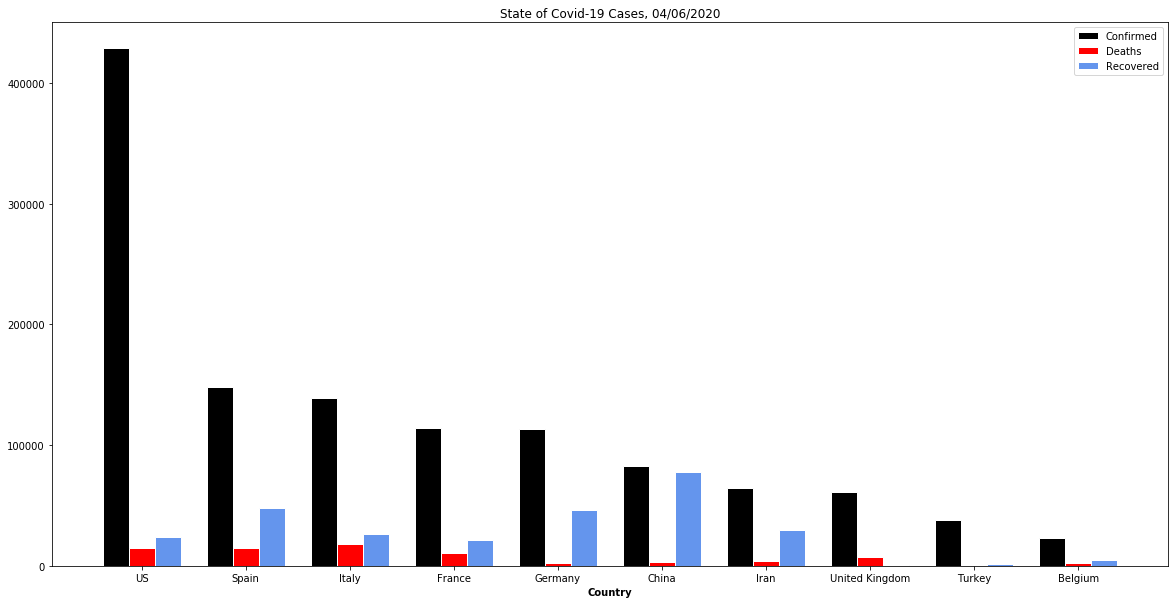

In [14]:
top10cases = april_06_dr_by_country.sort_values(by = ['Confirmed'], ascending = False).head(10)

# set width of bar
plt.figure(figsize=(20,10))
barWidth = 0.25
 
# Set position of bar on X axis
confirmed = np.arange(10)
deaths = [x + barWidth for x in confirmed]
recovered = [x + barWidth for x in deaths]
 
# Make the plot
plt.bar(confirmed, top10cases.Confirmed, color="black", width=barWidth, edgecolor='white', label='Confirmed')
plt.bar(deaths, top10cases.Deaths, color="red", width=barWidth, edgecolor='white', label='Deaths')
plt.bar(recovered, top10cases.Recovered, color='cornflowerblue', width=barWidth, edgecolor='white', label='Recovered')
 
# Add xticks on the middle of the group bars
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(10)], top10cases.Country_Region)
 
# Create legend & Show graphic
plt.legend()
plt.title("State of Covid-19 Cases, 04/06/2020")
plt.show()


The daily reports list the amount of confirmed cases, deaths, and recovered cases for a province/state in a country.

### Time Series

In [15]:
# Time Series - Global confirmed cases
ts_global_confirmed = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
ts_global_confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,170,174,237,273,281,299,349,367,423,444
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,223,243,259,277,304,333,361,377,383,400
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,584,716,847,986,1171,1251,1320,1423,1468,1572
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,370,376,390,428,439,466,501,525,545,564
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,8,8,8,10,14,16,17,19


In [16]:
# Time Series - Global deaths
ts_global_deaths = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
ts_global_deaths.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,6,6,7,7,11,14,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,11,15,15,16,17,20,20,21,22,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,35,44,58,86,105,130,152,173,193,205
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,8,12,14,15,16,17,18,21,22,23
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [17]:
# Time Series - Global recovered
ts_global_recovered = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
ts_global_recovered.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,5,5,10,10,10,15,18,18,29
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,44,52,67,76,89,99,104,116,131,154
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,46,61,61,62,90,90,90,113,237
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,10,10,10,10,16,21,26,31,39,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,1,1,1,2,2,2,2,2


In [18]:
ts_global_recovered_by_country = ts_global_recovered.groupby(['Country/Region']).sum().reset_index()
ts_top10recovered = ts_global_recovered_by_country.loc[ts_global_recovered_by_country['Country/Region'].isin(top10cases.Country_Region)]
ts_top10recovered


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
16,Belgium,50.8333,4.0000,0,0,0,0,0,0,0,...,1527,1696,2132,2495,2872,3247,3751,3986,4157,4681
36,China,1083.3367,3684.4197,28,30,36,39,49,58,101,...,75923,76206,76405,76565,76760,76946,77207,77310,77410,77567
61,France,91.3624,59.7192,0,0,0,0,0,0,0,...,7964,9513,11053,12548,14135,15572,16349,17428,19523,21452
65,Germany,51.0000,9.0000,0,0,0,0,0,0,0,...,13500,16100,18700,22440,24575,26400,28700,28700,36081,46300
80,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,13911,14656,15473,16711,17935,19736,19736,24236,27039,29812
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,14620,15729,16847,18278,19758,20996,21815,22837,24392,26491
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,16780,19259,22647,26743,30513,34219,38080,40437,43208,48021
170,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,...,162,243,333,415,484,786,1042,1326,1582,1846
171,US,37.0902,-95.7129,0,0,0,0,0,0,0,...,5644,7024,8474,9001,9707,14652,17448,19581,21763,23559
175,United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,0,...,171,179,179,192,208,215,229,287,325,345


In [19]:
ts_global_confirmed_by_country = ts_global_confirmed.groupby(['Country/Region']).sum().reset_index()
ts_top10confirmed = ts_global_confirmed_by_country.loc[ts_global_confirmed_by_country['Country/Region'].isin(top10cases.Country_Region)]
ts_top10confirmed


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
16,Belgium,50.8333,4.0000,0,0,0,0,0,0,0,...,11899,12775,13964,15348,16770,18431,19691,20814,22194,23403
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,82198,82279,82361,82432,82511,82543,82602,82665,82718,82809
61,France,91.3624,59.7192,0,0,2,3,3,3,4,...,45170,52827,57749,59929,65202,90848,93773,98963,110065,113959
65,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296
80,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,41495,44605,47593,50468,53183,55743,58226,60500,62589,64586
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422
156,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220
170,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,...,10827,13531,15679,18135,20921,23934,27069,30217,34109,38226
171,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,161831,188172,213372,243762,275586,308853,337072,366667,396223,429052
175,United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,0,...,22453,25481,29865,34173,38689,42477,48436,52279,55949,61474


In [20]:
ts_top10confirmed['Country/Region'].iloc[0]

'Belgium'

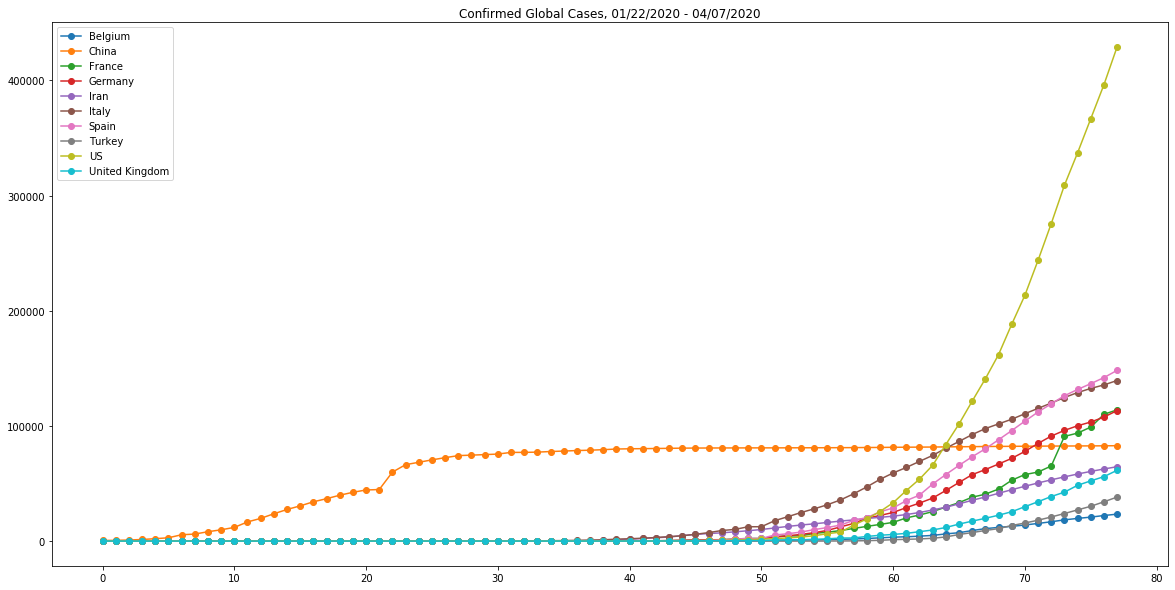

In [21]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10confirmed.T[3:])), ts_top10confirmed.T[3:].T.iloc[i], marker = 'o', 
             label = ts_top10confirmed['Country/Region'].iloc[i])

plt.legend()
plt.title("Confirmed Global Cases, 01/22/2020 - 04/07/2020")
plt.show()

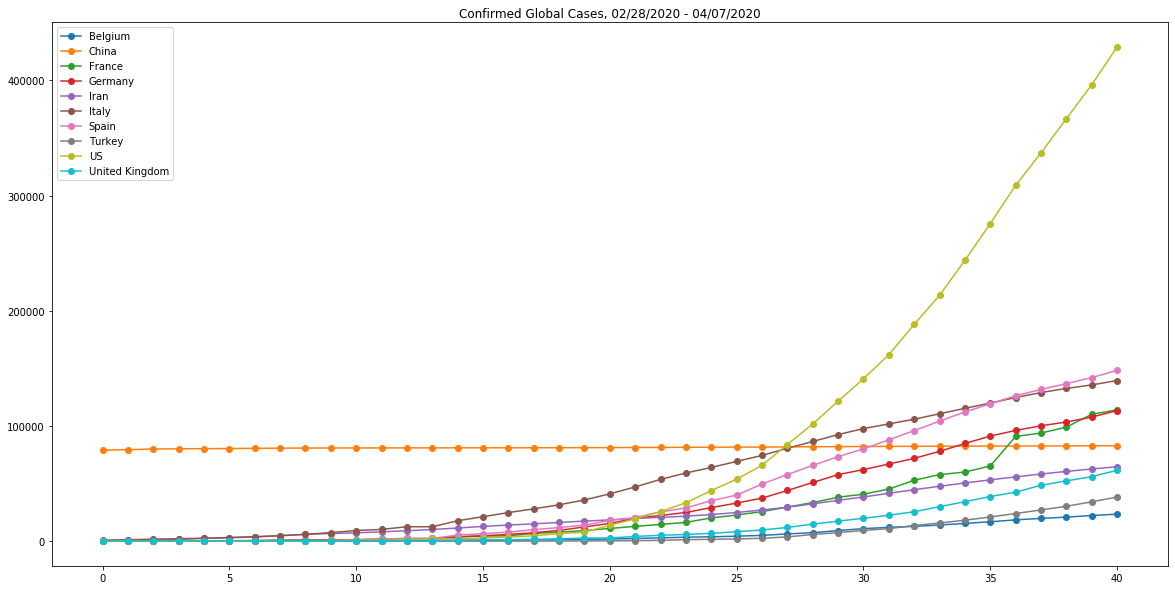

In [22]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10confirmed.T[40:])), ts_top10confirmed.T[40:].T.iloc[i], marker = 'o', 
             label = ts_top10confirmed['Country/Region'].iloc[i])

plt.legend()
plt.title("Confirmed Global Cases, 02/28/2020 - 04/07/2020")
plt.show()

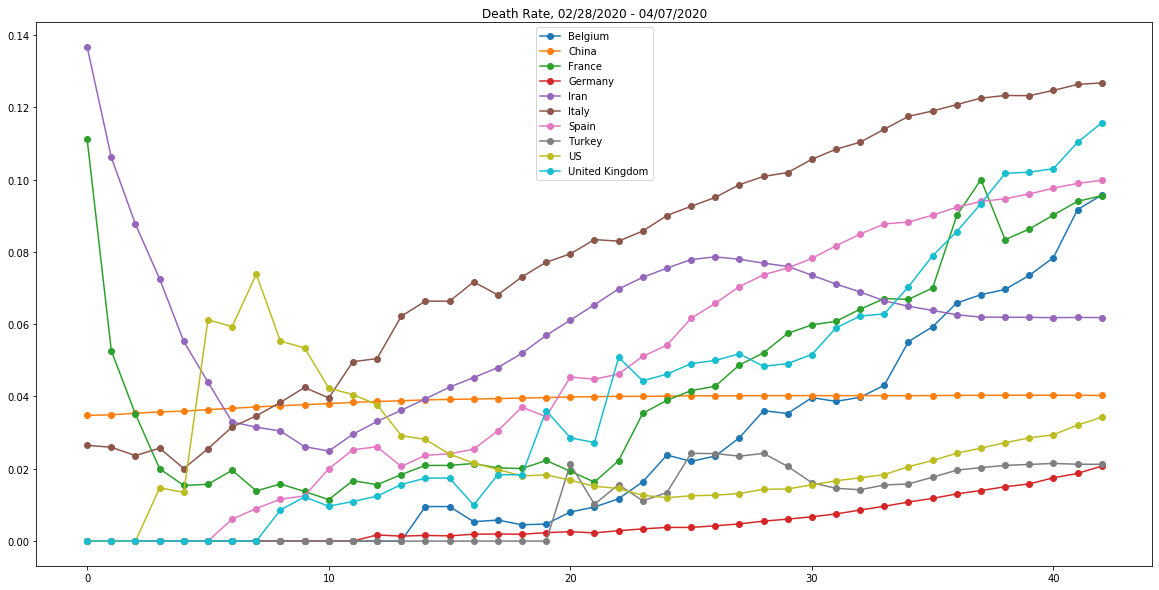

In [23]:
ts_global_death_by_country = ts_global_deaths.groupby(['Country/Region']).sum().reset_index()
ts_top10deaths = ts_global_death_by_country.loc[ts_global_death_by_country['Country/Region'].isin(top10cases.Country_Region)]

df_death_rate = ts_top10deaths.T[3:].T / (ts_top10confirmed.T[3:].T + 0.000001)
df_left = ts_top10deaths.T[:3].T
ts_top10_death_rate = pd.concat([df_left, df_death_rate], axis = 1, sort = False) 

plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10_death_rate.T[38:])), ts_top10_death_rate.T[38:].T.iloc[i], marker = 'o', 
             label = ts_top10_death_rate['Country/Region'].iloc[i])

plt.legend()
plt.title("Death Rate, 02/28/2020 - 04/07/2020")
plt.show()


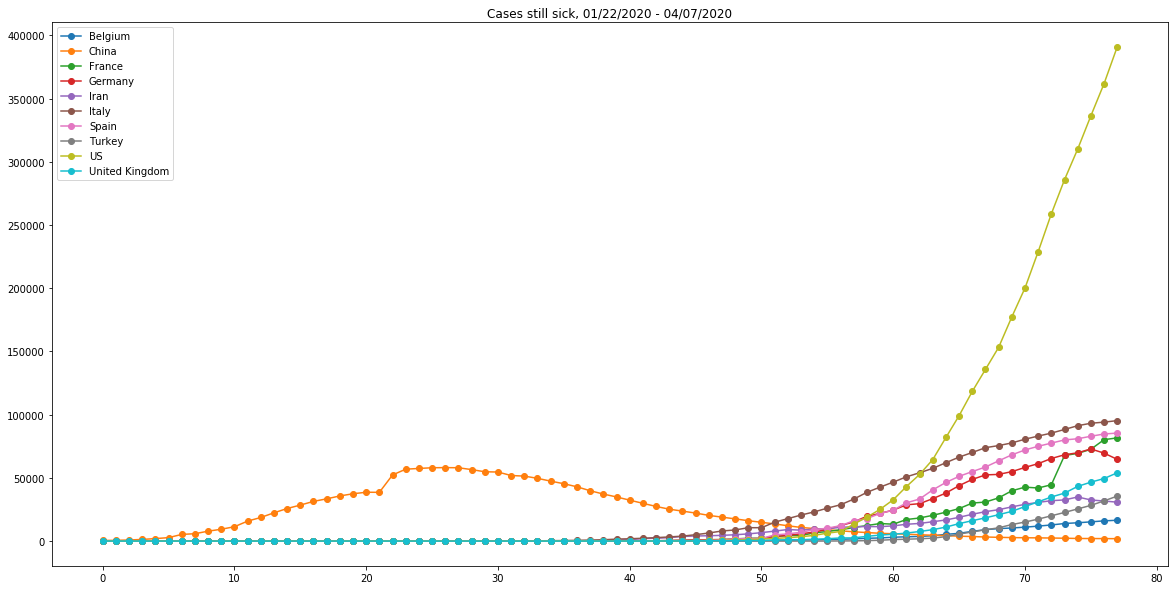

In [24]:
# What does the recovery look like? Confirmed - recovered - deaths
df_currentlysick = ts_top10confirmed.T[3:].T - ts_top10recovered.T[3:].T - ts_top10deaths.T[3:].T
df_left = ts_top10confirmed.T[:3].T
ts_top10_currentlysick = pd.concat([df_left, df_currentlysick], axis = 1, sort = False) 

plt.figure(figsize=(20,10))
for i in range(10):
    plt.plot(range(len(ts_top10_currentlysick.T[3:])), ts_top10_currentlysick.T[3:].T.iloc[i], marker = 'o', 
             label = ts_top10_currentlysick['Country/Region'].iloc[i])

plt.legend()
plt.title("Cases still sick, 01/22/2020 - 04/07/2020")
plt.show()


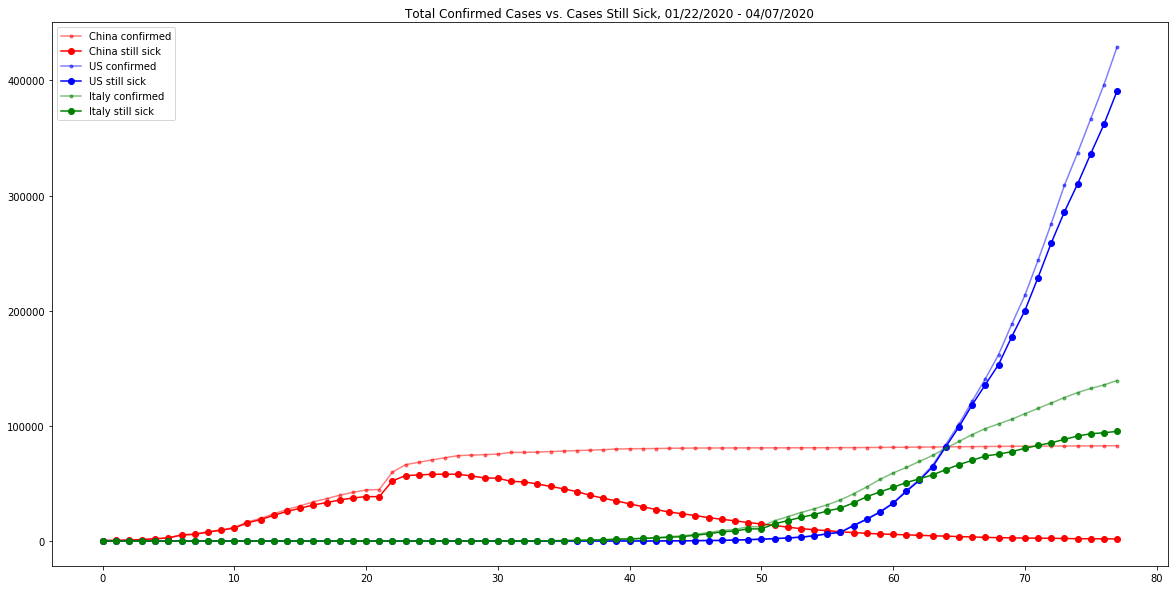

In [25]:
countries_to_plot = ['China', 'US', 'Italy']
color_per_country = ['red', 'blue', 'green']
plt.figure(figsize=(20,10))
for i, country in enumerate(countries_to_plot):
    plt.plot(range(len(ts_top10confirmed.T[3:])), 
             ts_top10confirmed.T[3:].T.loc[ts_top10confirmed['Country/Region'] == country].values.reshape(-1), 
             marker = '.', label = country + " confirmed", color = color_per_country[i], alpha = 0.5)
    plt.plot(range(len(ts_top10_currentlysick.T[3:])), 
             ts_top10_currentlysick.T[3:].T.loc[ts_top10_currentlysick['Country/Region'] == country].values.reshape(-1), 
             marker = 'o', label = country + " still sick", color = color_per_country[i])

plt.legend()
plt.title("Total Confirmed Cases vs. Cases Still Sick, 01/22/2020 - 04/07/2020")
plt.show()

In [26]:
# Time Series - US confirmed
ts_US_confirmed = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
ts_US_confirmed.head()


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,58,69,77,82,84,93,112,113,121,121
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,2,6,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,174,239,286,316,316,452,475,513,573,620
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,30,30,30,30,37,40,42,43,43,45


In [27]:
# Time Series - US deaths
ts_US_deaths = pd.read_csv('../covid/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
ts_US_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,2,3,3,4,4,4,4,4,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,1,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,6,8,11,12,15,18,20,21,23,24
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,1,1,1,1


## Midas Network Data

The Midas Network has data for US states and counties that has been used in NY Times articles as well as a handful of other countries. We will focus mainly on the US states.

In [32]:
# Midas NY Times data 
midas_april_07_us_states = pd.read_csv('../covid/midas_COVID-19/data/cases/united states of america/nytimes_covid19_data/20200408_us-states.csv')
midas_april_07_us_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


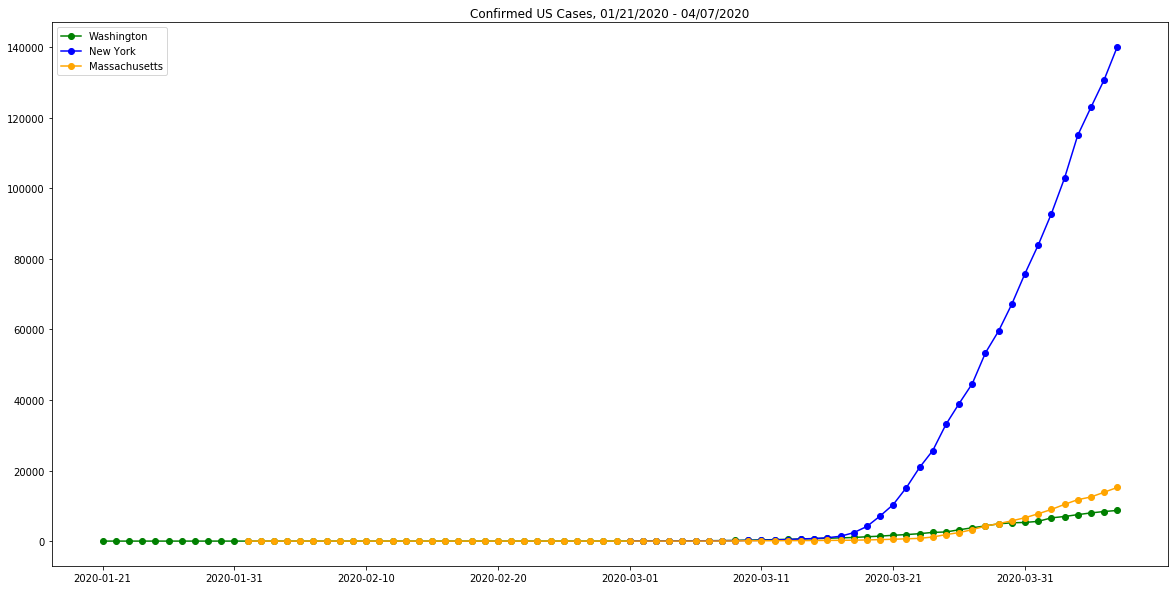

In [33]:
states_of_interest = ['Washington', 'New York', 'Massachusetts']
color_per_state = ['g', 'b', 'orange']

plt.figure(figsize=(20,10))
for i, state in enumerate(states_of_interest):
    plt.plot(midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date, 
             midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].cases, marker = 'o', 
             label = state, color = color_per_state[i])

ax = plt.gca()
max_value = midas_april_07_us_states['date'].max()
min_value = midas_april_07_us_states['date'].min()
number_of_steps = 10
l = np.arange(0, len(np.unique(midas_april_07_us_states.date)), number_of_steps)
ax.set(xticks=l)

plt.legend()
plt.title("Confirmed US Cases, 01/21/2020 - 04/07/2020")
plt.show()

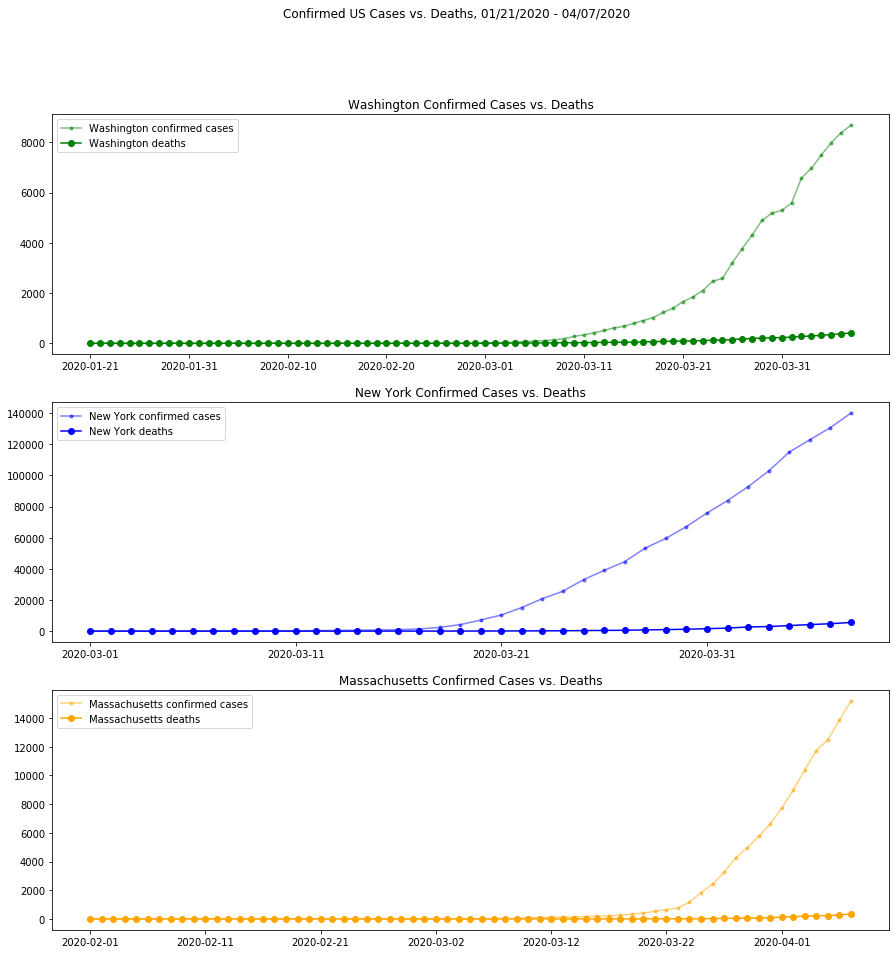

In [34]:
states_of_interest = ['Washington', 'New York', 'Massachusetts']
color_per_state = ['g', 'b', 'orange']

fig, ax = plt.subplots(3, 1, figsize=(15,15))
fig.suptitle("Confirmed US Cases vs. Deaths, 01/21/2020 - 04/07/2020")
for i, state in enumerate(states_of_interest):
    ax[i].plot(midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date, 
             midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].cases, marker = '.', 
             label = state + " confirmed cases", color = color_per_state[i], alpha = 0.5)
    ax[i].plot(midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date, 
             midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].deaths, marker = 'o', 
             label = state + " deaths", color = color_per_state[i])
    ax[i].legend()
    max_value = midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date.max()
    min_value = midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date.min()
    number_of_steps = 10
    l = np.arange(0, len(np.unique(midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date)), 
                  number_of_steps)
    ax[i].set(xticks=l)
    ax[i].set_title(state + " Confirmed Cases vs. Deaths")

plt.show()

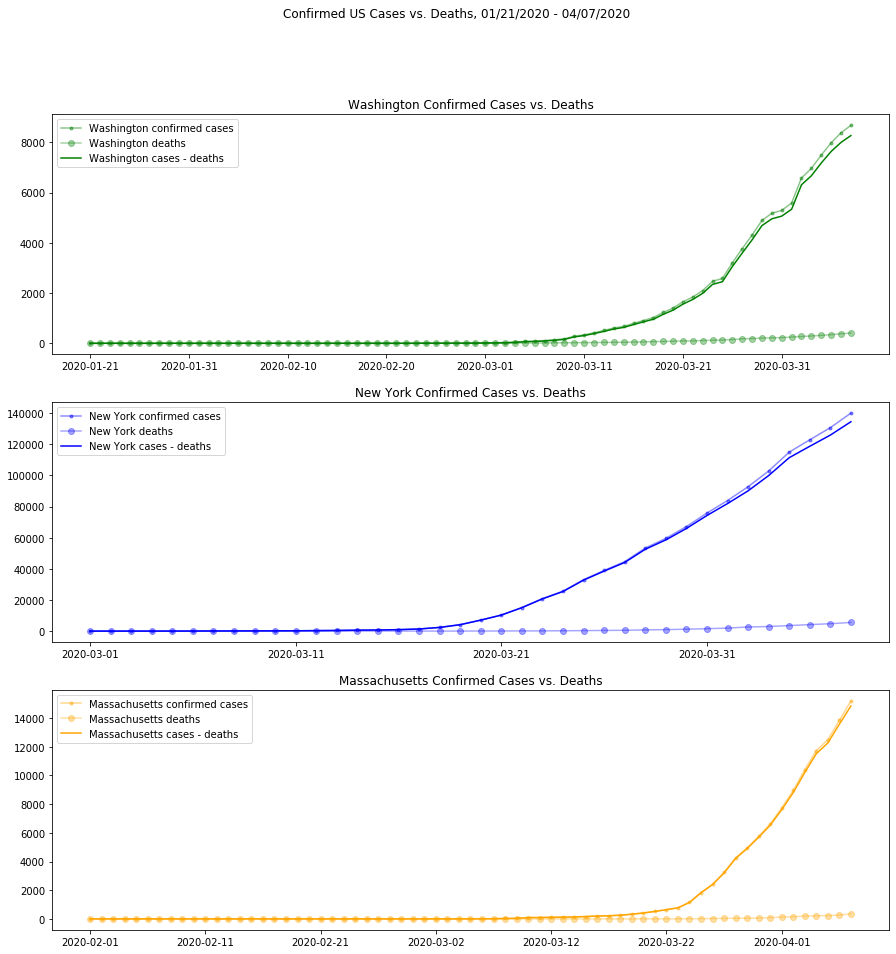

In [35]:
states_of_interest = ['Washington', 'New York', 'Massachusetts']
color_per_state = ['g', 'b', 'orange']

fig, ax = plt.subplots(3, 1, figsize=(15,15))
fig.suptitle("Confirmed US Cases vs. Deaths, 01/21/2020 - 04/07/2020")
for i, state in enumerate(states_of_interest):
    ax[i].plot(midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date, 
             midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].cases, marker = '.', 
             label = state + " confirmed cases", color = color_per_state[i], alpha = 0.45)
    ax[i].plot(midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date, 
             midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].deaths, marker = 'o', 
             label = state + " deaths", color = color_per_state[i], alpha = 0.35)
    ax[i].plot(midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date, 
             midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].cases - 
               midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].deaths, marker = '', 
             label = state + " cases - deaths", color = color_per_state[i])
    ax[i].legend()
    max_value = midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date.max()
    min_value = midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date.min()
    number_of_steps = 10
    l = np.arange(0, len(np.unique(midas_april_07_us_states.loc[midas_april_07_us_states['state'] == state].date)), 
                  number_of_steps)
    ax[i].set(xticks=l)
    ax[i].set_title(state + " Confirmed Cases vs. Deaths")

plt.show()

One thing to note is that the US data is missing recovered cases by state. We have total recovered cases per US, but we cannot make accurate claims about each state without the recovered cases per state. 